# Exercise 2.5

Create your own trajectory! Track your movements for an entire week, tracking all points of interest you visited (e.g., home, friends’ home, university, supermarket, gym, bars).</br>
*   Use https://www.itilog.com/ to detect Lat & Long of places based on their address.</br>
*   Create a TrajDataFrame in scikit-mobility and visualize it.</br>
*   If you want, add to TrajDataFrame the place’s name or address</br>
*   Submit the notebook and the data, or a link to them</br>

## Installing the packages

In [ ]:
# correct order to avoid errors
!pip install Shapely
!pip install folium
!pip install Fiona
!pip install pyproj
!pip install rtree
!pip install pygeos
!pip install scikit-mobility
!pip install -U geopandas #scikit mobilty force the installation of geopandas 0.9 for compatibiltiy but it removes some features as "sjoin" from geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 7.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 7.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 7.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 7.7 MB/s 
     |███████████████

## Importing Libraries

In [ ]:
import skmob
import folium
import pandas as pd
import numpy as np
import geopandas as gpd

In [ ]:
#checking the conflicting libraries' version
print(skmob.__version__)
print(gpd.__version__)

1.2.3
0.10.2


## Input Trajectory Data

In [ ]:
saturday = [([1, 43.7206674, 10.4252877, '2022-09-17 08:00:00'], "Home"), 
            ([1, 43.7071906, 10.4055861, '2022-09-17 19:15:00'], "Friends' Home"), 
            ([1, 43.716960, 10.401893, '2022-09-17 21:00:00'], 'Vettovaglie Square'),
            ([1, 43.719398, 10.400017, '2022-09-17 22:30:00'], 'Cavalieri Square'),
            ([1, 43.7206674,10.4252877, '2022-09-17 23:30:00'], "Home")]
sunday = [([1, 43.7206674,10.4252877, '2022-09-18 08:00:00'], "Home"),
          ([1, 43.722100, 10.427340, '2022-09-18 11:15:00'], 'Lidl'),
          ([1, 43.7206674,10.4252877, '2022-09-18 12:00:00'], "Home"),
          ([1, 43.71385226903308, 10.400499278428782, '2022-09-18 16:30:00'], 'Shopping'),
          ([1, 43.7198426, 10.3967103, '2022-09-18 17:45:00'], 'Botanical Garden'),
          ([1, 43.720328, 10.399998, '2022-09-18 19:15:00'], 'Canteen'),
          ([1, 43.7206674,10.4252877, '2022-09-18 21:15:00'], "Home")]
monday = [([1, 43.7206674,10.4252877, '2022-09-19 08:15:00'], "Home"),
          ([1, 43.72106549682832, 10.407852561033963, '2022-09-19 08:40:00'], 'University'),
          ([1, 43.720328, 10.399998, '2022-09-19 12:40:00'], 'Canteen'),
          ([1, 43.7206674,10.4252877, '2022-09-19 14:15:00'], "Home")]
tuesday = [([1, 43.7206674,10.4252877, '2022-09-20 08:15:00'], "Home"),
           ([1, 43.72106549682832, 10.407852561033963, '2022-09-20 08:40:00'], 'University'),
           ([1, 43.708189, 10.398398, '2022-09-20 16:30:00'], 'Pisa Station'),
           ([1, 45.484761648845875, 9.202616609958255, '2022-09-20 22:15:00'], 'Milano Station'),
           ([1, 45.48248697417392, 9.241146382893874, '2022-09-20 23:15:00'], 'Host House')]
wednesday = [([1, 45.48248697417392, 9.241146382893874, '2022-09-21 07:15:00'], 'Host House'),
            ([1, 45.462728681238445, 9.177320717118477, '2022-09-21 09:15:00'], 'Brother Graduation'),
            ([1, 45.4673437, 9.1534524, '2022-09-21 13:50:00'], 'Restaurant'),
            ([1, 45.484761648845875, 9.202616609958255, '2022-09-21 16:00:00'], 'Milano Station'),
            ([1, 43.708189, 10.398398, '2022-09-21 20:30:00'], 'Pisa Station'),
            ([1, 43.7206674,10.4252877, '2022-09-21 21:15:00'], "Home")]
thursday = [([1, 43.7206674,10.4252877, '2022-09-22 08:15:00'], "Home"),
            ([1, 43.72106549682832, 10.407852561033963, '2022-09-22 08:40:00'], 'University'),
            ([1, 43.720328, 10.399998, '2022-09-22 13:15:00'], 'Canteen'),
            ([1, 43.7206674,10.4252877, '2022-09-22 17:15:00'], "Home")]
friday = [([1, 43.7206674,10.4252877, '2022-09-23 08:00:00'], "Home"),
          ([1, 43.72106549682832, 10.407852561033963, '2022-09-23 08:40:00'], 'University'),
          ([1, 43.720328, 10.399998, '2022-09-23 12:55:00'], 'Canteen'),
          ([1, 43.7206674,10.4252877, '2022-09-23 14:15:00'], "Home")]

In [ ]:
week_data = [saturday, sunday, monday, tuesday, wednesday, thursday, friday]

In [ ]:
#separating list data and labels for compatibility reasons
data_skmob = [x[0] for el in week_data for x in el]
labels = [x[1] for el in week_data for x in el]

## Building the TrajDataFrame

In [ ]:
#building the trajectory dataframe
tdf = skmob.TrajDataFrame(data_skmob, user_id = 0, latitude = 1, longitude = 2, datetime = 3)
#adding the day of the week to the dataframe as the trajectory id (tid by library convention)
tdf['tid'] = tdf['datetime'].dt.day_name()
#adding the labels to the tdf
tdf['label'] = labels
tdf

,uid,lat,lng,datetime,tid,label
0,1,43.720667,10.425288,2022-09-17 08:00:00,Saturday,Home
1,1,43.707191,10.405586,2022-09-17 19:15:00,Saturday,Friends' Home
2,1,43.716960,10.401893,2022-09-17 21:00:00,Saturday,Vettovaglie Square
3,1,43.719398,10.400017,2022-09-17 22:30:00,Saturday,Cavalieri Square
4,1,43.720667,10.425288,2022-09-17 23:30:00,Saturday,Home
5,1,43.720667,10.425288,2022-09-18 08:00:00,Sunday,Home
6,1,43.722100,10.427340,2022-09-18 11:15:00,Sunday,Lidl
7,1,43.720667,10.425288,2022-09-18 12:00:00,Sunday,Home
8,1,43.713852,10.400499,2022-09-18 16:30:00,Sunday,Shopping
9,1,43.719843,10.396710,2022-09-18 17:45:00,Sunday,Botanical Garden


In [ ]:
#checking the type of the dataframe if a proper TrajDF or pandas DF
print(type(tdf))
#printing the datum used
print(tdf.crs)

<class 'skmob.core.trajectorydataframe.TrajDataFrame'>
{'init': 'epsg:4326'}


## Extracting the points of interest

In [ ]:
#creating point of interest locations. 
#I used average as aggregating function as lat and lng are not altered by it
#I transformed it into a dictionary to call the points later
pnt_int = tdf[['lat', 'lng']].groupby(tdf.label).agg(np.mean).T.to_dict()
pnt_int

{'Botanical Garden': {'lat': 43.7198426, 'lng': 10.3967103},
 'Brother Graduation': {'lat': 45.462728681238445, 'lng': 9.177320717118477},
 'Canteen': {'lat': 43.720328, 'lng': 10.399998},
 'Cavalieri Square': {'lat': 43.719398, 'lng': 10.400017},
 "Friends' Home": {'lat': 43.7071906, 'lng': 10.4055861},
 'Home': {'lat': 43.72066740000001, 'lng': 10.4252877},
 'Host House': {'lat': 45.48248697417392, 'lng': 9.241146382893874},
 'Lidl': {'lat': 43.7221, 'lng': 10.42734},
 'Milano Station': {'lat': 45.484761648845875, 'lng': 9.202616609958255},
 'Pisa Station': {'lat': 43.708189, 'lng': 10.398398},
 'Restaurant': {'lat': 45.4673437, 'lng': 9.1534524},
 'Shopping': {'lat': 43.71385226903308, 'lng': 10.400499278428782},
 'University': {'lat': 43.72106549682832, 'lng': 10.407852561033963},
 'Vettovaglie Square': {'lat': 43.71696, 'lng': 10.401893}}

## Creating the map and adding the POI

In [ ]:
#creating a map that focus on my home
fol_map = folium.Map(location=[43.7206674, 10.4252877], zoom_start=14)

In [ ]:
#this way I add the point of interest on the map
for point in pnt_int.keys():
    folium.Marker(list(pnt_int[point].values()), popup=point).add_to(fol_map)

## Creating colors for each Trajectories

In [ ]:
import random

#creating a function to create new random hexadecimal colors
def new_color():
    return "#%06x" % random.randint(0, 0xFFFFFF)

#creating a dictionary with random colors assigned to each trajectory
color_dict = {k:new_color() for k in tdf['tid'].unique()}
color_dict

{'Saturday': '#6b05f8',
 'Sunday': '#99c6ca',
 'Monday': '#3c6891',
 'Tuesday': '#0d7238',
 'Wednesday': '#20ce8e',
 'Thursday': '#ae183a',
 'Friday': '#ee2303'}

## Adding colored Trajectories to the Map

In [ ]:
for tid in tdf['tid'].unique():
    to_plot = tdf[tdf['tid'] == tid]
    to_plot.plot_trajectory(map_f = fol_map, max_points=None, max_users=1, start_end_markers = False, hex_color=color_dict[tid])

## Adding a legend

In [ ]:
#### NICE FUNCTION I ADAPTED FROM STACKOVERFLOW TO PLOT THE LEGEND ####
def add_categorical_legend(folium_map, title, label_color_dict):
    
    legend_categories = ""     
    for label, color in label_color_dict.items():
        legend_categories += f"<li><span style='background:{color}'></span>{label}</li>"
        
    legend_html = f"""
    <div id='maplegend' class='maplegend'>
      <div class='legend-title'>{title}</div>
      <div class='legend-scale'>
        <ul class='legend-labels'>
        {legend_categories}
        </ul>
      </div>
    </div>
    """
    script = f"""
        <script type="text/javascript">
        var oneTimeExecution = (function() {{
                    var executed = false;
                    return function() {{
                        if (!executed) {{
                             var checkExist = setInterval(function() {{
                                       if ((document.getElementsByClassName('leaflet-top leaflet-right').length) || (!executed)) {{
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].style.display = "flex"
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].style.flexDirection = "column"
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].innerHTML += `{legend_html}`;
                                          clearInterval(checkExist);
                                          executed = true;
                                       }}
                                    }}, 100);
                        }}
                    }};
                }})();
        oneTimeExecution()
        </script>
      """
   

    css = """

    <style type='text/css'>
      .maplegend {
        z-index:9999;
        float:right;
        background-color: rgba(255, 255, 255, 1);
        border-radius: 5px;
        border: 2px solid #bbb;
        padding: 10px;
        font-size:12px;
        positon: relative;
      }
      .maplegend .legend-title {
        text-align: left;
        margin-bottom: 5px;
        font-weight: bold;
        font-size: 90%;
        }
      .maplegend .legend-scale ul {
        margin: 0;
        margin-bottom: 5px;
        padding: 0;
        float: left;
        list-style: none;
        }
      .maplegend .legend-scale ul li {
        font-size: 80%;
        list-style: none;
        margin-left: 0;
        line-height: 18px;
        margin-bottom: 2px;
        }
      .maplegend ul.legend-labels li span {
        display: block;
        float: left;
        height: 16px;
        width: 30px;
        margin-right: 5px;
        margin-left: 0;
        border: 0px solid #ccc;
        }
      .maplegend .legend-source {
        font-size: 80%;
        color: #777;
        clear: both;
        }
      .maplegend a {
        color: #777;
        }
    </style>
    """

    folium_map.get_root().header.add_child(folium.Element(script + css))

    return folium_map

In [ ]:
#adding the legend
fol_map = add_categorical_legend(fol_map, 'Trajectory by day:', color_dict)

## Result

In [ ]:
#plotting the result
fol_map

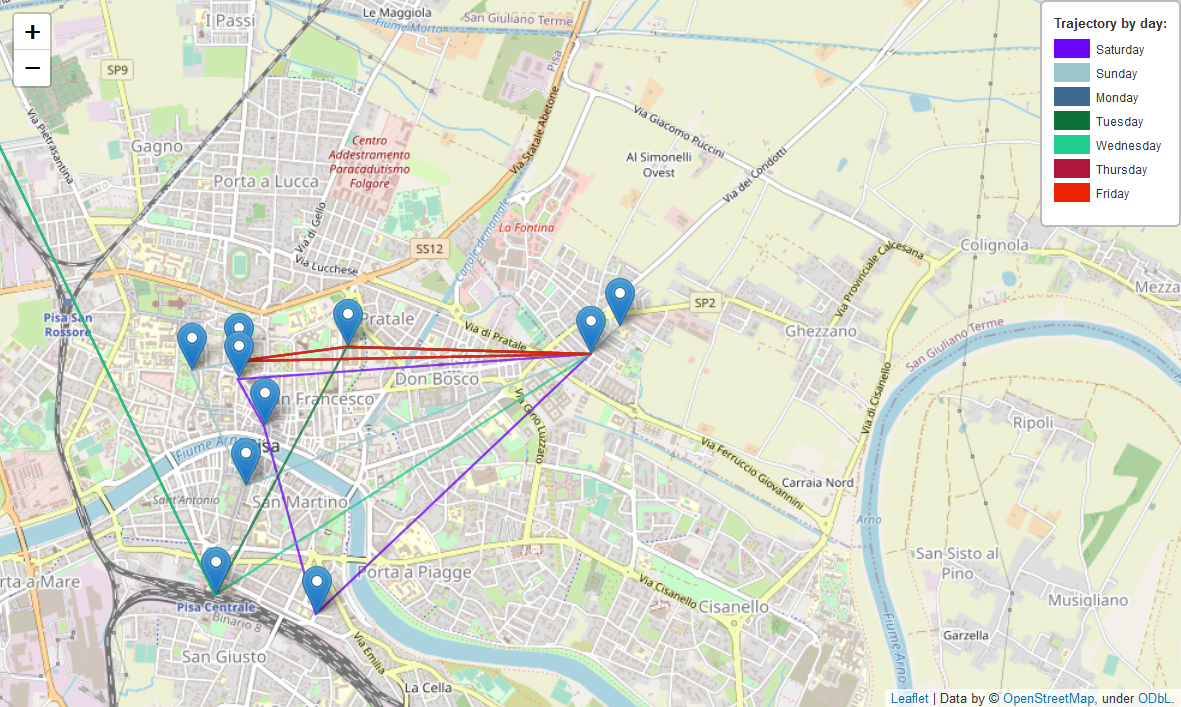